# PRML Session P1.2 CLUSTERING ALGORITHMS

## Task 1: Apply K-Means, Agglomerative and Gaussian Mixture Models clustering methods to the Antantirca Penguin's database and compare the results

- step 1: Load the penguins dataset from seaborn library
- step 2: Manage potential missing observations using an imputation strategy
- step 3: Choose the numerical features, excluding non-numerical and visualize them with a scatter plot matrix
- step 4: Apply K-Means, Agglomerative Clustering, and Gaussian Mixture Models to the set of numerical variables, adjusting the number of clusters based on the number of categories for each categorical variable (sex, species, island). (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html; https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html; https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)
- step 5: Evaluate clustering performance using the Adjusted Rand Index (ARI) by measuring the similarity between the clustering results and the true class labels for each categorical variable, https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html.


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male  


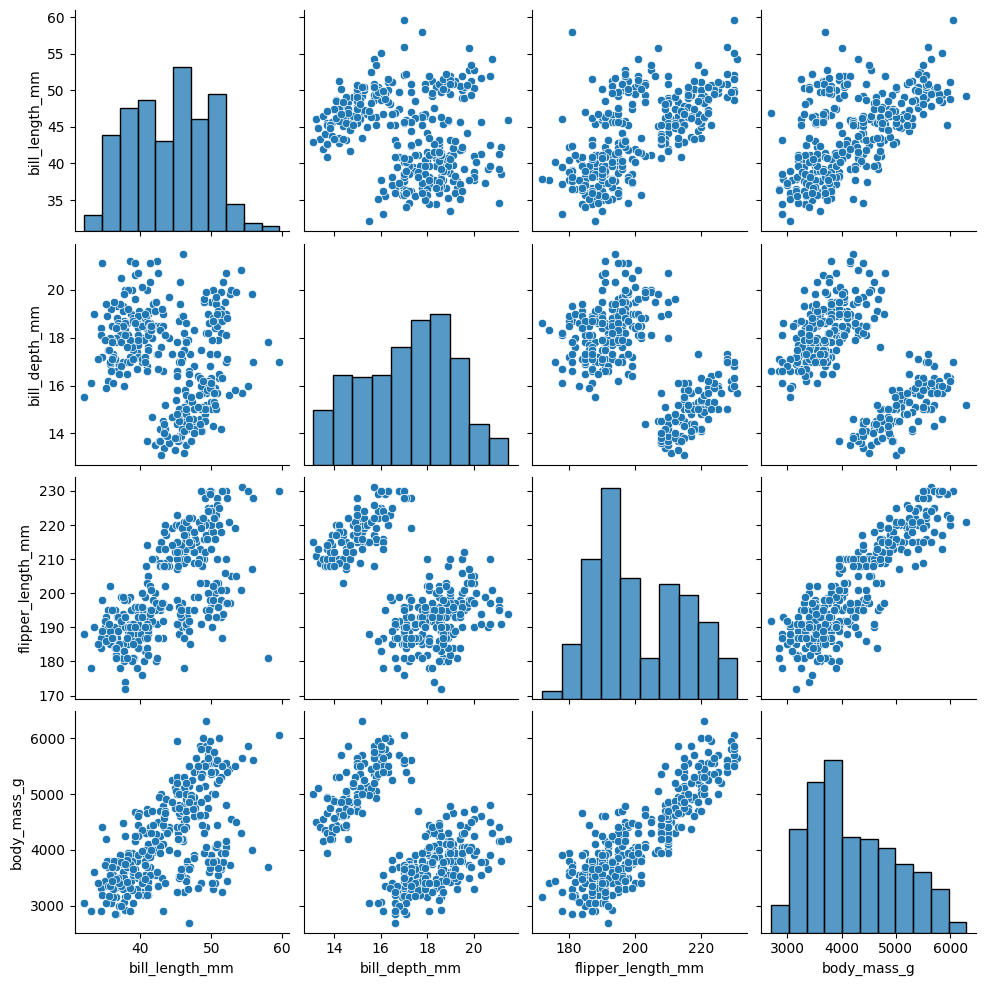

In [3]:
import seaborn as sns

# Step 1: Load dataset
penguins = sns.load_dataset("penguins")

# Step 2: Remove nan values
penguins = penguins.dropna()
print(penguins.head(5))

# Step 3: scatter plot matrix
sns.pairplot(penguins)

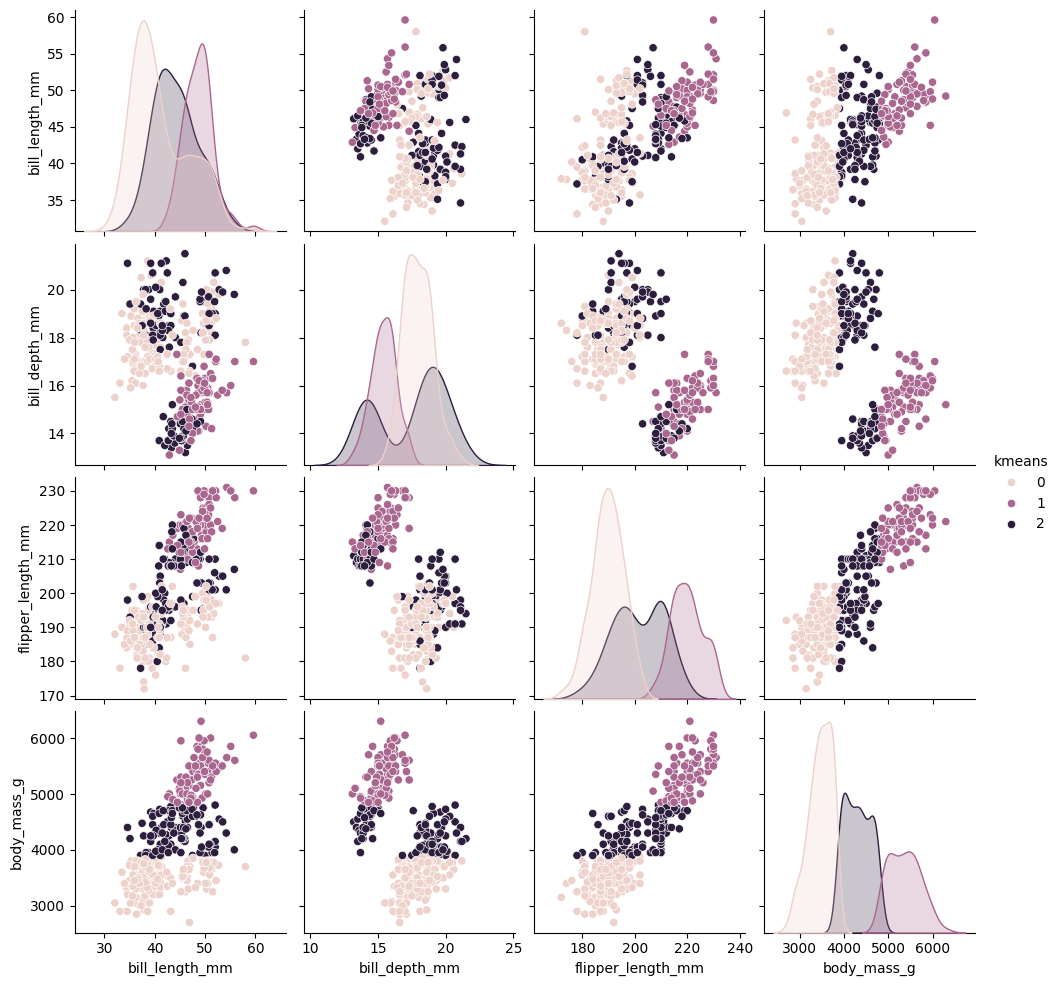

In [35]:
# Step 4: Apply K-means + Agglomerative Clustering + Gaussian Mixture Models

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

    # K-means
items = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins_numeric = penguins[items]

group = KMeans(n_clusters=3).fit_predict(penguins_numeric)
penguins["kmeans"] = group

penguins_plot = penguins[items+["kmeans"]]
sns.pairplot(penguins_plot, hue="kmeans")

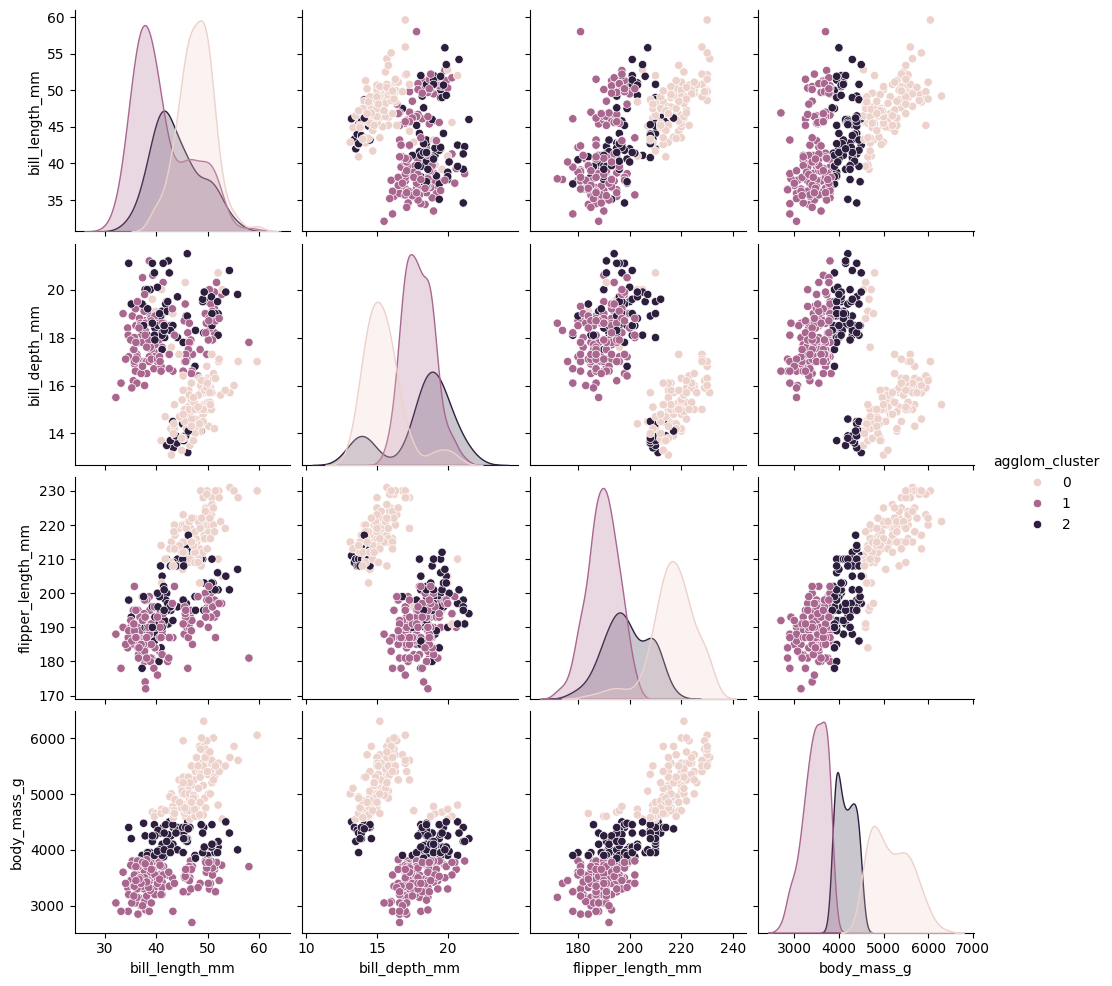

In [34]:
    # Agglomerative Clustering

group = AgglomerativeClustering(n_clusters=3).fit_predict(penguins_numeric)
penguins["agglom_cluster"] = group

penguins_plot = penguins[items+["agglom_cluster"]]
sns.pairplot(penguins_plot, hue="agglom_cluster")

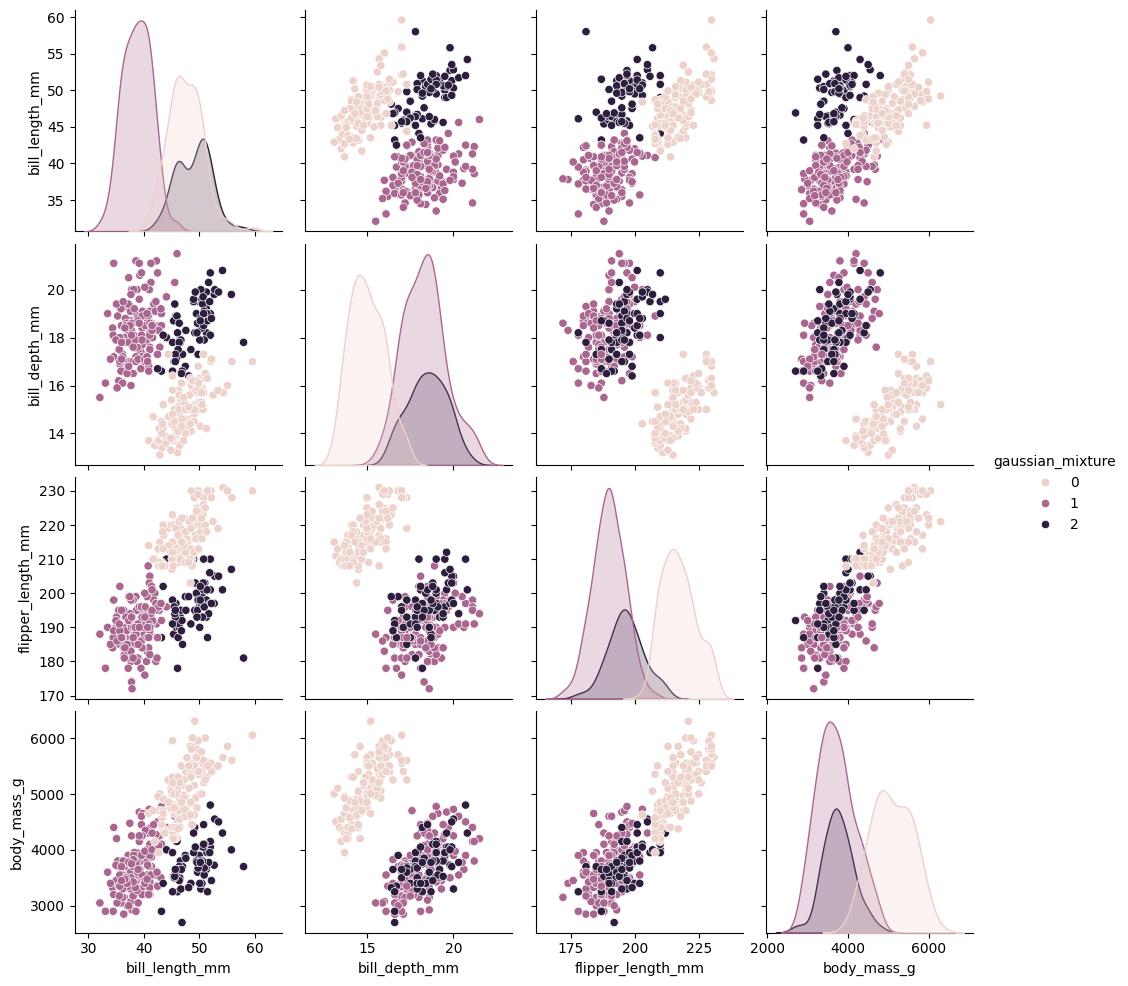

In [32]:
    # Gaussian Mixture
group = GaussianMixture(n_components=3).fit_predict(penguins_numeric)
penguins["gaussian_mixture"] = group

penguins_plot = penguins[items+["gaussian_mixture"]]
sns.pairplot(penguins_plot, hue="gaussian_mixture")

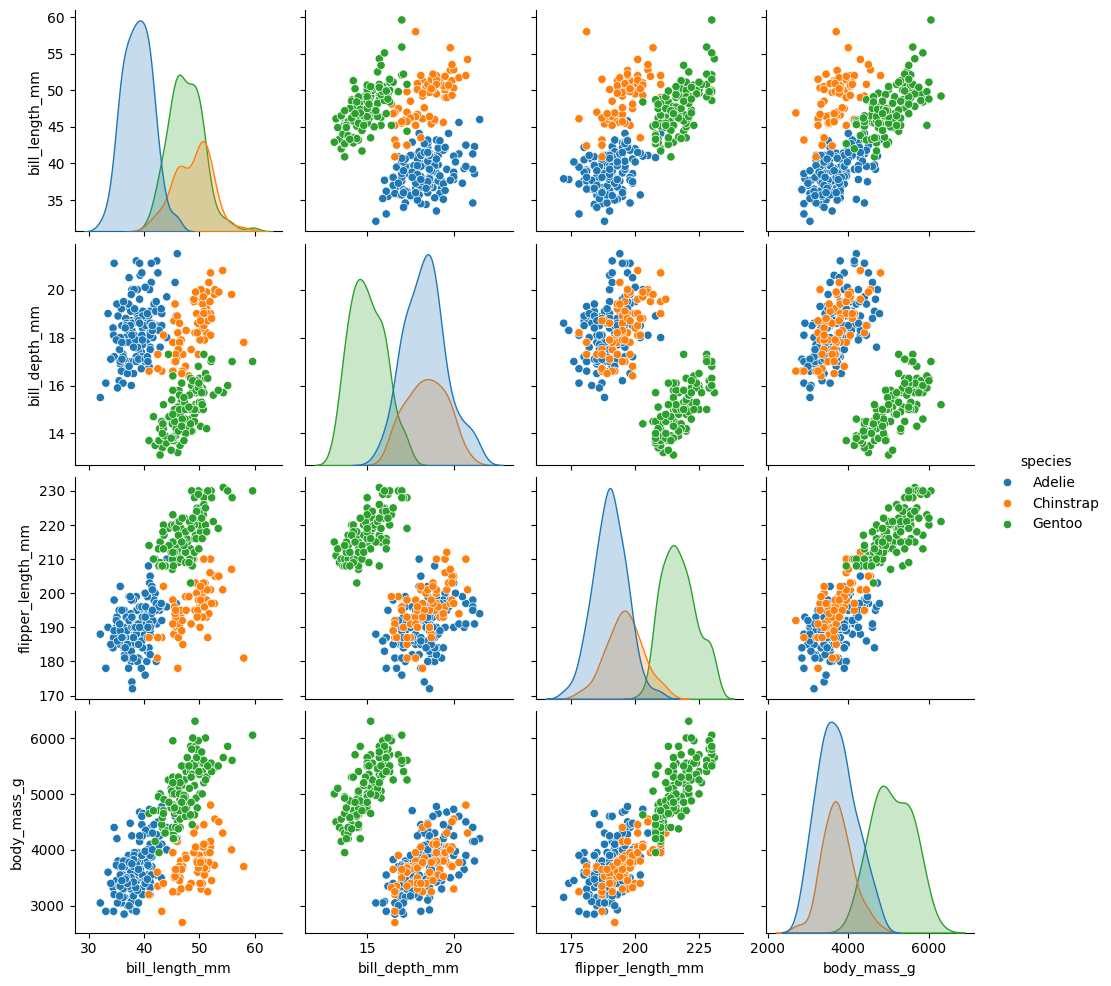

In [ ]:
# Step 5: Evaluate Clustering Performance
from sklearn.metrics import adjusted_rand_score

# Show ground truth
penguins_plot = penguins[items + ["species", "island", "sex"]]
sns.pairplot(penguins_plot, hue="species")

# Gaussian Mixture performance
    # NOTES:
    #   - how are we supposed to match each clustered group to each of the categorical variables ???
# adjusted_rand_score()

## Task 2: Object segmentation using clustering

- step 1: Load an Image and visualize
- step 2: Reshape image matrix as 1d array
- step 3 (exercise): Apply k-means  
- step 4 (exercise): Reshape result back as a matrix and visualize
- Step 5 (exercise): Compare k-means (k=2) and Otsu segmentation (https://en.wikipedia.org/wiki/Otsu%27s_method)

Step 1: Load image and visualize

/tmp/ipykernel_29038/368590247.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(IC) # visualize image using imshow function
/tmp/ipykernel_29038/368590247.py:5: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


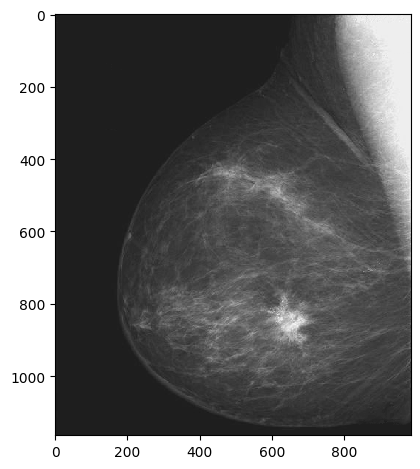

In [37]:
import skimage as sk # load skimage libraries
from skimage import io
IC = sk.io.imread('../data/image1.tif') # read image using imread function
sk.io.imshow(IC) # visualize image using imshow function
sk.io.show()

Step 3: Reshape image as 1d array

In [38]:
# reshape the image as 1d array:
v = IC.reshape(IC.shape[0]*IC.shape[1],1)
v.shape

(1145376, 1)

Step 4 (exercise):

In [43]:
# Apply K-Means
v_kmeans = KMeans(n_clusters=2).fit_predict(v)


Step 5 (exercise):

/tmp/ipykernel_29038/1995316113.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(clustered_img) # visualize image using imshow function
/home/vaive/Documents/ML_MSc/machine_learning_tools/.venv/lib/python3.10/site-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


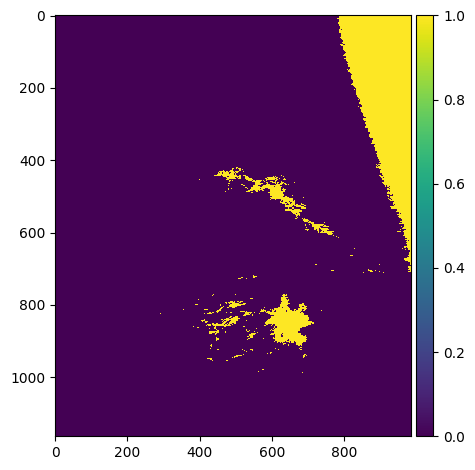

In [44]:
# Reshape back to image and visualize
clustered_img = v_kmeans.reshape(IC.shape[0], IC.shape[1])
sk.io.imshow(clustered_img) # visualize image using imshow function

Step 6 (exercise): Compare k-means result with k=2 with Otsu segmentation

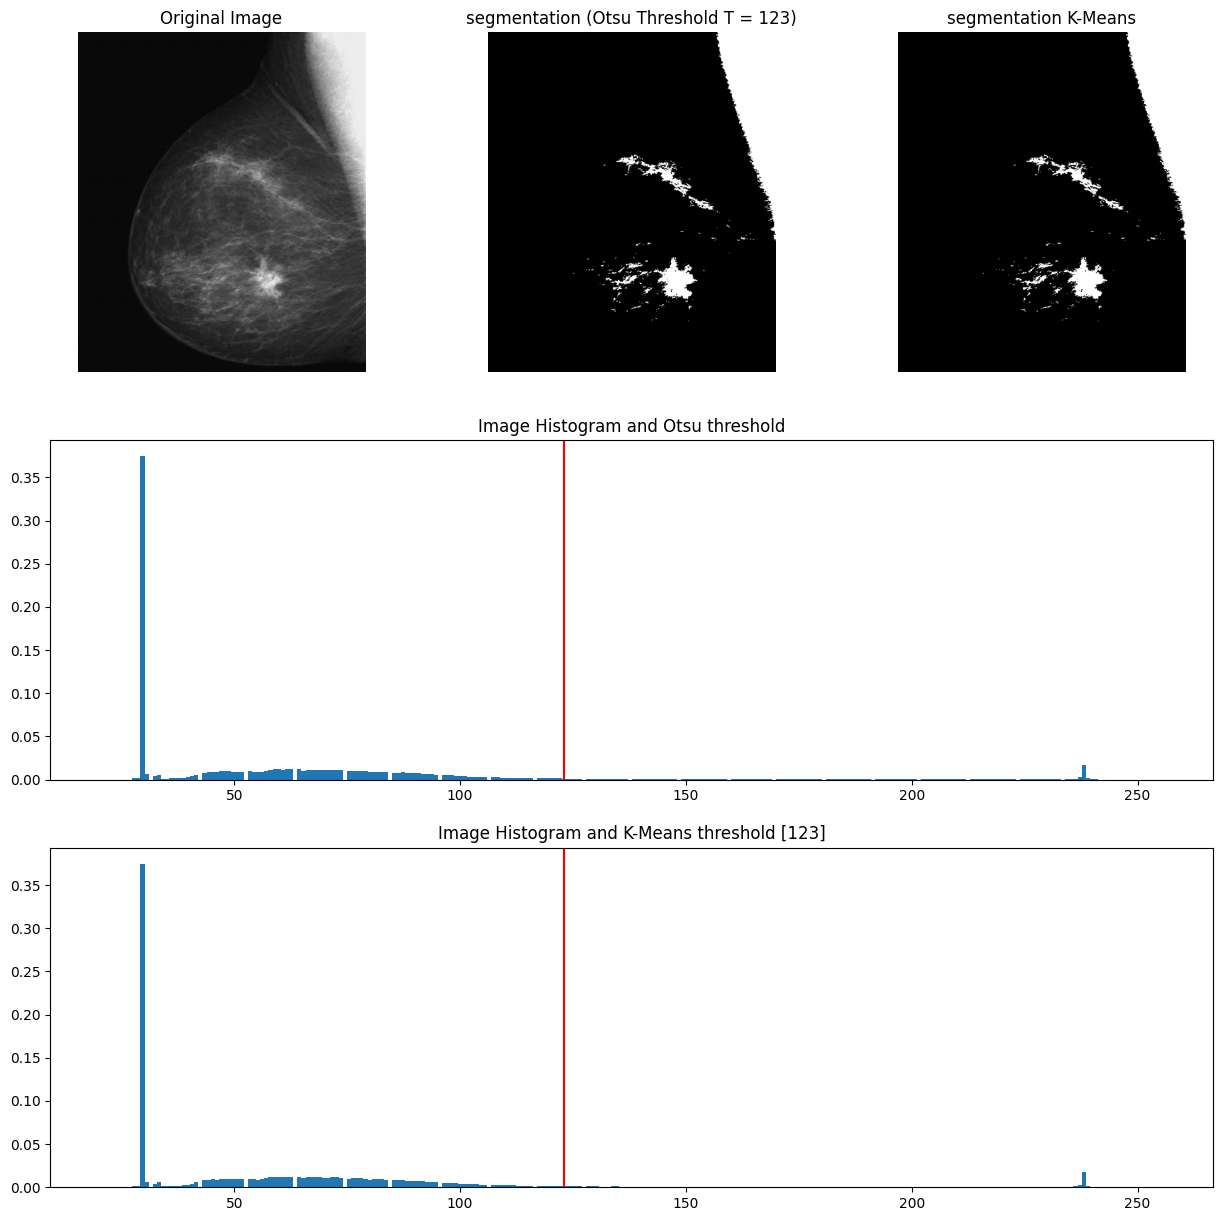

In [50]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
from skimage.filters import threshold_otsu

# Find Otsu's threshold for training image:
threshold_otsu = threshold_otsu(IC)

# Apply threshold to test image:
I_otsu = IC >= threshold_otsu

fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(3, 3)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(IC, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_otsu, cmap=plt.cm.gray)
ax2.set_title('segmentation (Otsu Threshold T = {})'.format(threshold_otsu))
ax2.set_axis_off()

ax3 = fig.add_subplot(gs[0,2])
ax3.imshow(clustered_img, cmap=plt.cm.gray)
ax3.set_title('segmentation K-Means')
ax3.set_axis_off()

ax4 = fig.add_subplot(gs[1,:])
ax4.hist(IC.ravel(), bins=256, density=True)
ax4.axvline(threshold_otsu, color='r')
ax4.set_title('Image Histogram and Otsu threshold')

# Find K-Means threshold
kmeans_threshold = max(v[v_kmeans == 0])

ax5 = fig.add_subplot(gs[2,:])
ax5.hist(IC.ravel(), bins=256, density=True)
ax5.axvline(kmeans_threshold, color='r')
ax5.set_title(f'Image Histogram and K-Means threshold {kmeans_threshold}')
plt.show()
